## Example of running DLGA on real PDE data (KdV equation)

### Visualization Checklist:
1. Training Process Visualization
   - 1.1 Training Loss Curve
   - 1.2 Validation Loss Curve
   - 1.3 Optimization Analysis (weights & diversity)
   - 1.4 Evolution Visualization

2. Solution Analysis
   - 2.1 PDE Solution Comparison
   - 2.2 Residual Analysis
   - 2.3 Time Slice Comparison

3. Equation Discovery Analysis
   - 3.1 Term Relationship Plot
   - 3.2 Metadata Plane Visualization
   - 3.3 Derivative Relationships

In [1]:
import os
import sys
import torch
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from pathlib import Path

# Add project root to Python path
current_dir = os.path.dirname(os.path.abspath('__file__'))
kd_main_dir = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.append(kd_main_dir)

from kd.dataset import load_kdv_equation
from kd.model.dlga import DLGA
from kd.viz.dlga_viz import *
from kd.viz.dlga_kdv import *
from kd.viz.equation_renderer import *

## 1. Load and prepare data

In [2]:
kdv_data = load_kdv_equation()
x, t, u = kdv_data.x, kdv_data.t, kdv_data.usol

# Extract data
X_train, y_train = kdv_data.sample(n_samples=1000)

## 2. Model training

In [3]:
# Initialize model
model = DLGA(epi=0.1, input_dim=2, max_iter=2000)  # 2D input: (x,t)

# Train the model
print("\nTraining DLGA model...")
model.fit(X_train, y_train)



Training DLGA model...
===============train Net=================
iter_num: 500      loss: 0.00458484    loss_validate: 1.00382606
iter_num: 1000      loss: 0.00058682    loss_validate: 1.01136009
iter_num: 1500      loss: 0.00016943    loss_validate: 1.01391642
iter_num: 2000      loss: 0.00014397    loss_validate: 1.01459554


c:\Users\Administrator\.venv\machine_learning\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
  1%|          | 1/100 [00:00<01:36,  1.03it/s]

iter: 1
The best Chrom: [[0, 1], [3]]
The best coef:  
[[-0.3600212]
 [-0.0008904]]
The best fitness: 2.067921038146264
The best name: u_t


  4%|▍         | 4/100 [00:03<01:33,  1.02it/s]

iter: 4
The best Chrom: [[0, 0], [1, 2], [3], [0, 1], [1]]
The best coef:  
[[ 0.39467188]
 [-0.00262303]
 [-0.00131299]
 [-0.82615994]
 [ 0.14090392]]
The best fitness: 1.6803352028751497
The best name: u_t


 20%|██        | 20/100 [00:19<01:19,  1.01it/s]

iter: 20
The best Chrom: [[1, 2], [1], [0, 1], [3], [2]]
The best coef:  
[[-0.00260409]
 [ 0.1370222 ]
 [-0.8273782 ]
 [-0.00134145]
 [-0.00113233]]
The best fitness: 1.5202304156765447
The best name: u_t


 21%|██        | 21/100 [00:20<01:19,  1.00s/it]

iter: 21
The best Chrom: [[0, 1], [1, 2], [3], [1]]
The best coef:  
[[-0.83951523]
 [-0.00265292]
 [-0.00135996]
 [ 0.13832575]]
The best fitness: 1.4400312775088415
The best name: u_t


 28%|██▊       | 28/100 [00:27<01:11,  1.00it/s]

iter: 28
The best Chrom: [[0, 1], [1, 2], [3]]
The best coef:  
[[-0.7621601 ]
 [-0.00218714]
 [-0.00162812]]
The best fitness: 1.417732378888246
The best name: u_t


 89%|████████▉ | 89/100 [01:28<00:11,  1.08s/it]

iter: 89
The best Chrom: [[0, 1], [3], [1, 2]]
The best coef:  
[[-0.7621601 ]
 [-0.00162812]
 [-0.00218714]]
The best fitness: 1.4177323788882346
The best name: u_t


100%|██████████| 100/100 [01:38<00:00,  1.02it/s]

-------------------------------------------
Finally discovered equation
The best Chrom: [[0, 1], [3], [1, 2]]
The best coef:  
[[-0.7621601 ]
 [-0.00162812]
 [-0.00218714]]
The best fitness: 1.4177323788882346
The best name: u_t
---------------------------------------------

Final solution debug info:
Chromosome length: 3
Coefficient shape: (3, 1)
Chromosome: [[0, 1], [3], [1, 2]]
Coefficients: [[-0.7621601 ]
 [-0.00162812]
 [-0.00218714]]

Debug convert_chrom_to_eq:
Chromosome length: 3
Coefficient shape: (3, 1)
Chromosome structure: [[0, 1], [3], [1, 2]]
Coefficients: [[-0.7621601 ]
 [-0.00162812]
 [-0.00218714]]
Generated equation: u_t=-0.7622*u*ux+-0.0016*uxxx+-0.0022*ux*uxx
equation form: u_t=-0.7622*u*ux+-0.0016*uxxx+-0.0022*ux*uxx

[Equation Renderer INFO] Successfully received data from DLGA:
  Original chromosome (list of modules, a module is a list of gene indices):
    Term 1 - Module (gene indices): [0, 1]
      Meaning (product of terms): u * ux
    Term 2 - Module (gene i

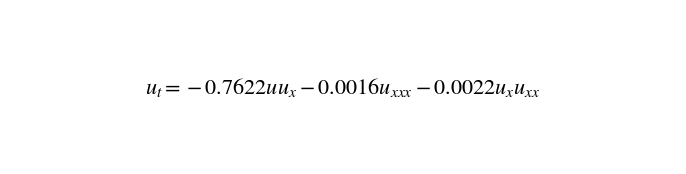

In [4]:
render_latex_to_image(model.eq_latex)

## 3. Generate predictions

In [5]:
print("\nGenerating predictions...")

# Create full grid for visualization
X_full = kdv_data.mesh()
# Convert to tensor and predict
X_tensor = torch.from_numpy(X_full.astype(np.float32)).to(model.device)
with torch.no_grad():
    u_pred = model.Net(X_tensor).cpu().numpy().reshape(u.shape)


Generating predictions...


## 4. Visualizations

Setting up the global plotting style

In [6]:
print("\nCreating visualizations...")

# Configure global plotting style
configure_plotting(cmap='viridis')


Creating visualizations...


### 1. Training Process Visualization
#### 1.1 Training Loss Curve

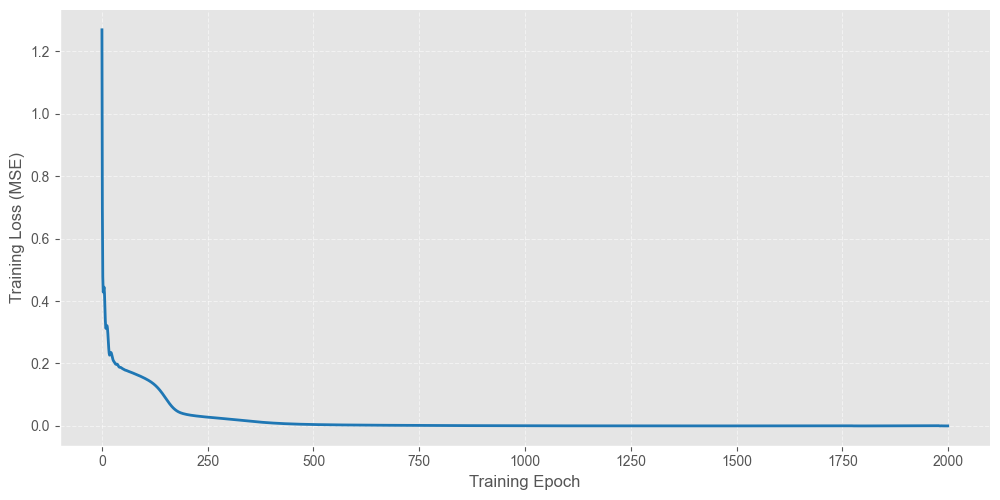

In [7]:
plot_training_loss(model)

#### 1.2 Validation Loss Curve

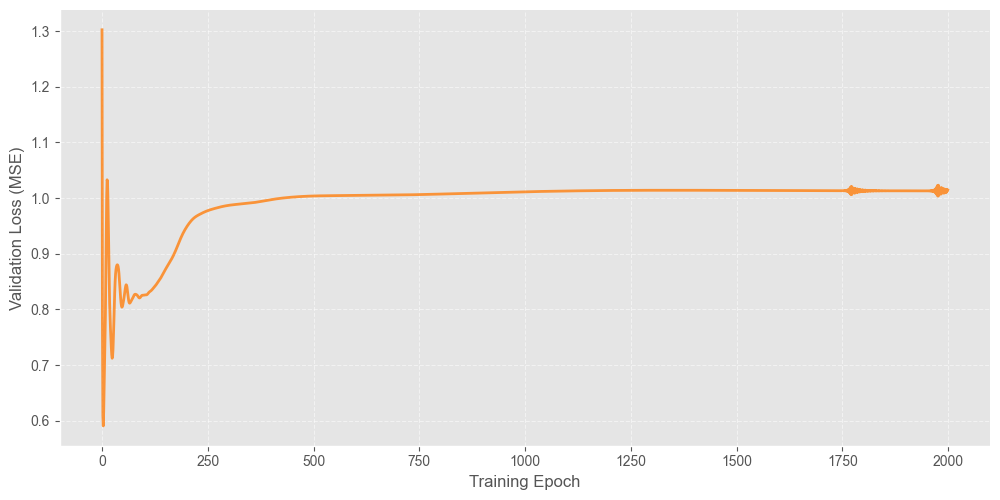

In [8]:
plot_validation_loss(model)

#### 1.3 Optimization Analysis (weights & diversity history)

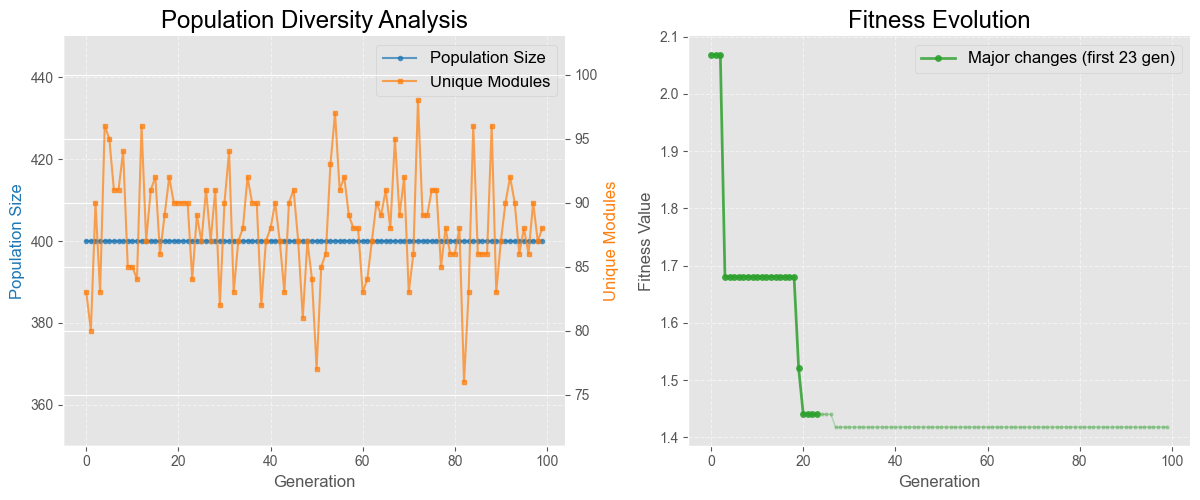


Optimization Analysis Summary:
Initial fitness: 2.0679
Final fitness: 1.4177
Major improvements occurred in first 23 generations
Improvement in major change period: 30.36%
Total improvement: 31.44%
Average population size: 400.0
Average unique modules: 88.2
Diversity ratio: 22.05%


In [9]:
plot_optimization_analysis(model)

#### 1.4 Evolution Visualization

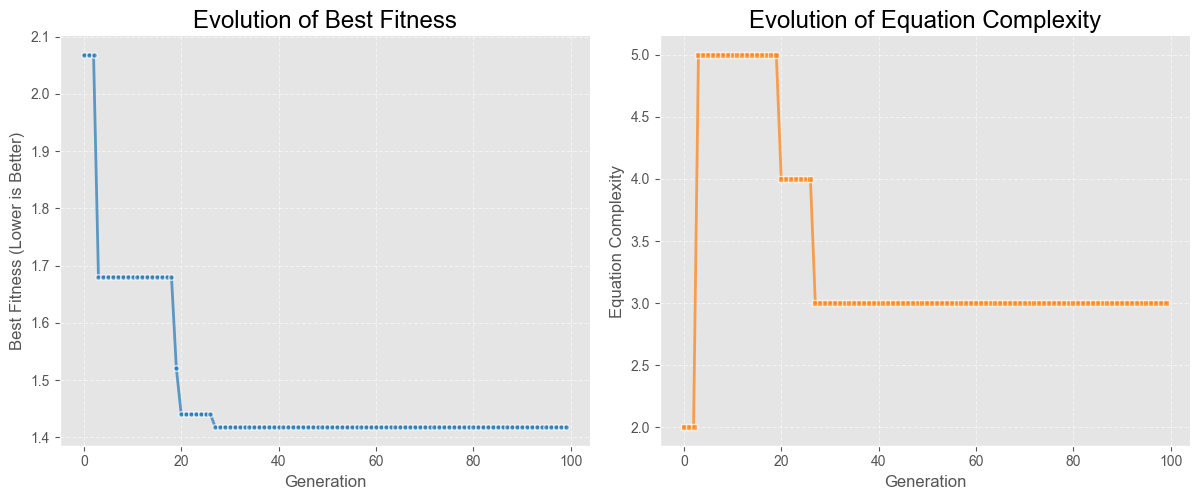


Evolution Analysis Summary:
Initial fitness: 2.0679
Final fitness: 1.4177
Improvement: 31.44%
Initial complexity: 2
Final complexity: 3


In [10]:
plot_evolution(model)

### 2. Solution Analysis
#### 2.1 PDE Solution Comparison

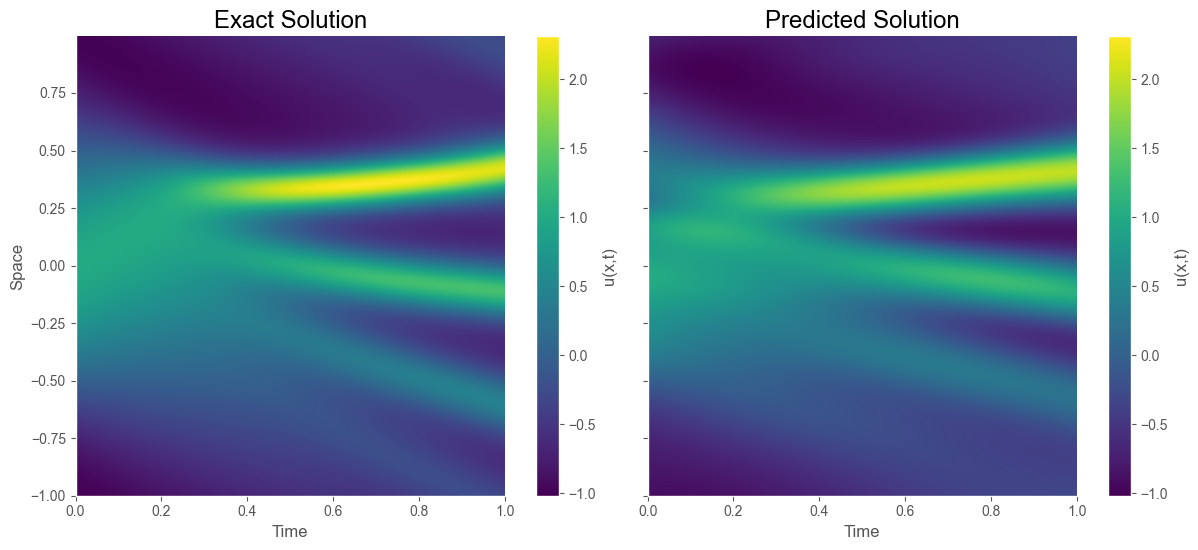

In [11]:
plot_pde_comparison(
    x=x,
    t=t,
    u_true=u,
    u_pred=u_pred
)

#### 2.2 Residual Analysis

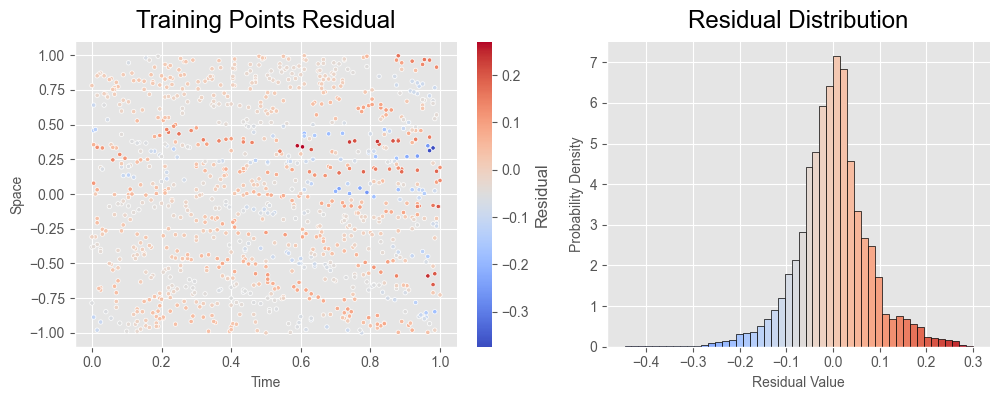

In [12]:
plot_residual_analysis(
    model=model,
    X_train=X_train,
    y_train=y_train,
    u_true=u,
    u_pred=u_pred,
)

#### 2.3 Time Slice Comparison

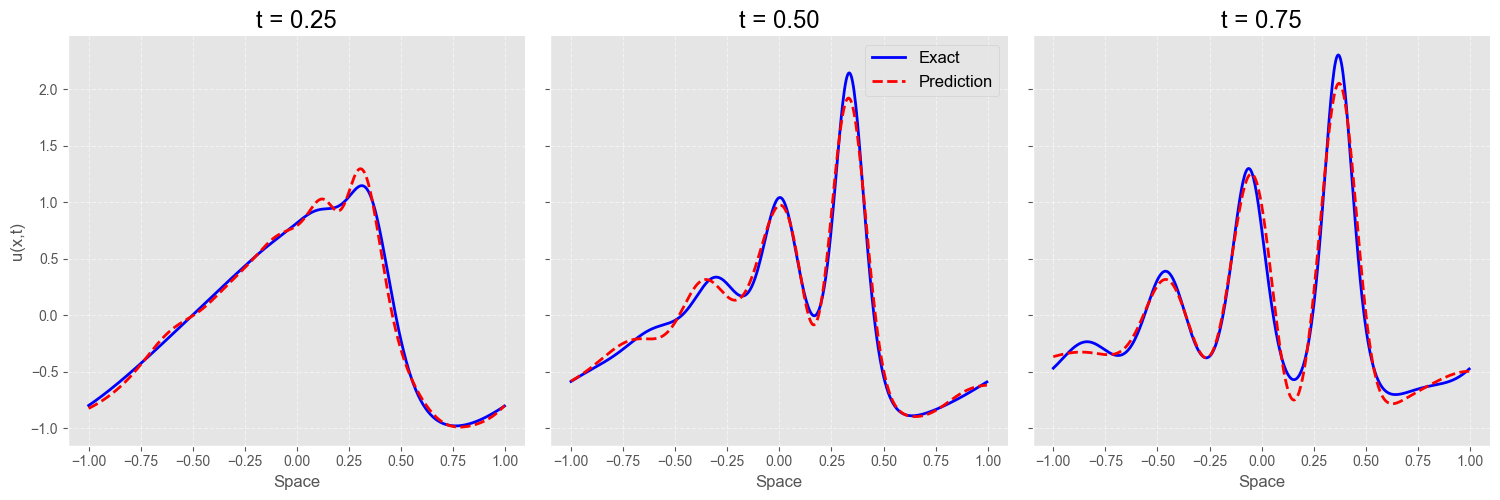

In [13]:
plot_time_slices(
    x=x,
    t=t,
    u_true=u,
    u_pred=u_pred,
    slice_times=[0.25, 0.5, 0.75]
)

### 3. Equation Discovery Analysis
#### 3.1 Term Relationship Plot

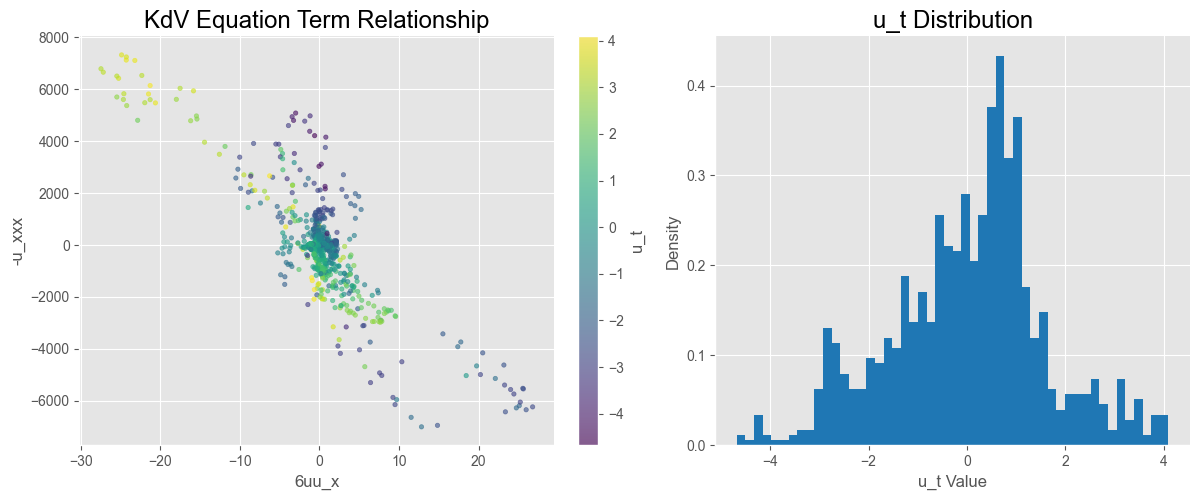

In [14]:
plot_equation_terms(
    model.metadata,
    terms={
        'x_term': {'vars': ['u', 'u_x'], 'label': '6uu_x'},
        'y_term': {'vars': ['u_xxx'], 'label': '-u_xxx'}
    },
    equation_name="KdV Equation",
)

#### 3.2 Metadata Plane Visualization (equation residuals on the x-t plane)


Interpolation info:
Source points shape: (961, 2)
Target grid shape: T=(512, 201), X=(512, 201)
Values shape: u_t=(961,), u=(961,)


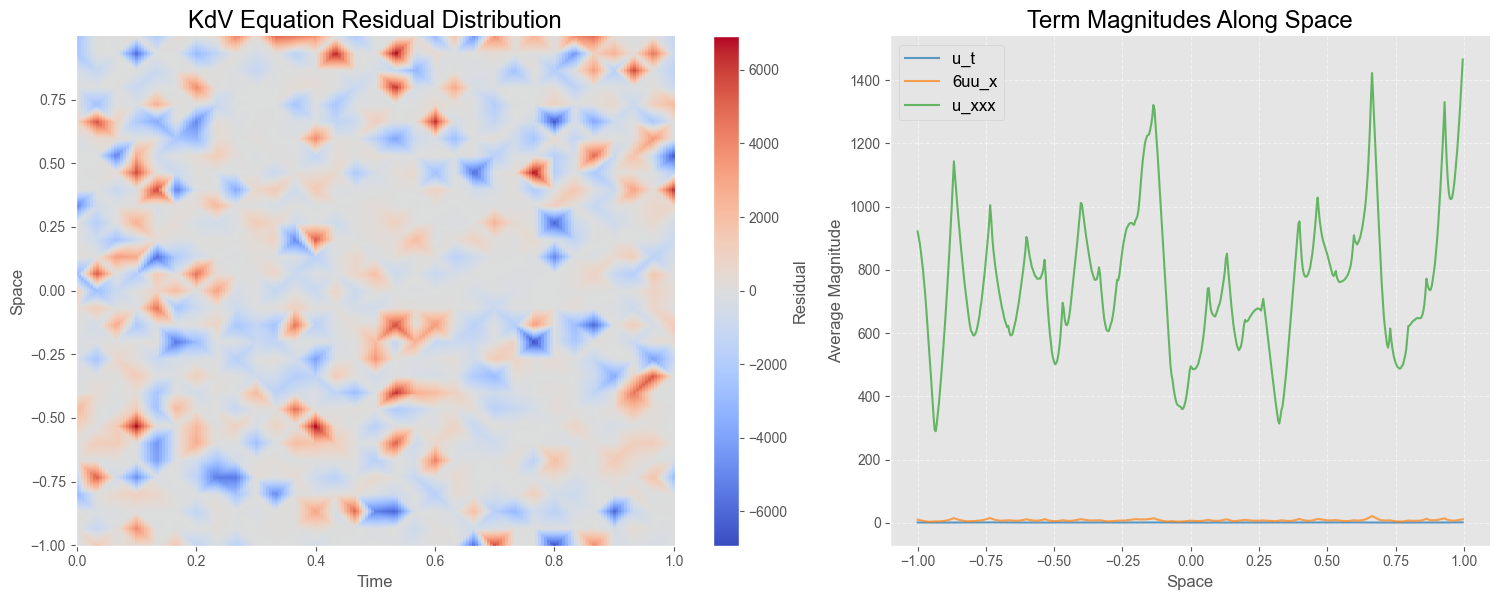


Metadata Plane Analysis:
Residual statistics:
  Mean: -9.8313e+01
  Std:  1.2018e+03
  Max:  6.9318e+03

Term magnitude statistics:
  u_t: 8.5983e-01
  6uu_x: 7.7197e+00
  u_xxx: 7.5540e+02


In [15]:
plot_metadata_plane(metadata=model.metadata, x=x, t=t)

#### 3.3 Derivative Relationships Visualization

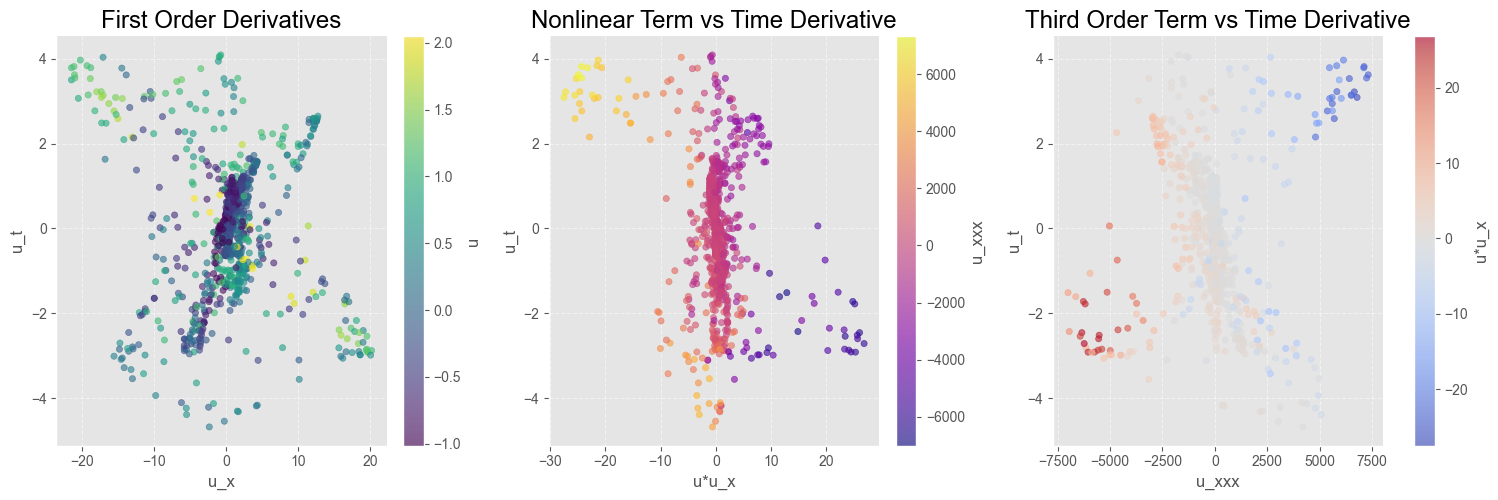

In [16]:
plot_derivative_relationships(metadata=model.metadata)